# Salt Pond KO correlations with Env
###### modified from Salinity Gradient: SF_ Sal MG working with Heat, Scatter, subsets: Env, Ontol 
###### New Ontology INTEGRATION version

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from scipy.stats import norm
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
# import fastcluster
warnings.filterwarnings('ignore')
%matplotlib inline

## Gather input data

### Environment data

In [2]:
# Import and clean environment data
# IMPROVED LOG DATA
Sal_meta = pd.read_csv('Salt_Pond_metaLOG_FIX.txt', sep='\t', index_col=0)

Sal_meta.loc[:,['CH4_umol_m2_d','CH4_m2_lin']]
# Sal_meta.head(10)

,CH4_umol_m2_d,CH4_m2_lin
0,NaN,-24.30
1,NaN,-24.30
2,NaN,-1.76
3,NaN,-1.76
4,NaN,-7.10
5,NaN,-7.10
6,0.646404,4.43
7,0.646404,4.43
8,1.617525,41.45
9,1.617525,41.45


In [3]:
# OLD LINEAR DATA 
# Sal_meta = pd.read_csv('SF_sal_meta_FIX.txt', sep='\t', index_col=1)
# Sal_meta['logCH4'] = np.log10(Sal_meta['CH4_ug_m2_h'])  
# Sal_metaS = Sal_meta.sort_values(by='Site_indx') #, inplace=True)
# Sal_meta.columns # Sal_meta.head(10)

### @@@@@@@@@@@@@@@@@@@@@@@
## Subset environment

### Make Environment Subsets

In [4]:
### DEPTH
Depth1_ONLY = Sal_meta[Sal_meta['Depth'].str.contains('D1')]
Depth2_ONLY = Sal_meta[Sal_meta['Depth'].str.contains('D2')]


# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# Environment SUBSET Selector

In [5]:
#   [[[ ON / OFF ]]]            # by commenting out -- NOTE Sequence will matter if [[[ ON ]]]

# Sal_meta = Depth1_ONLY        # Depth 1
# Sal_meta = Depth1_ONLY        # Depth 2


# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

### @@@@@@@@@@@@@@@@@@@@@@@
### Env. Chem variable selector

In [6]:
## CUT Down Env. Data
env_chem_List = ['Salinity','Cond_uS_cm', 'Temp', 'DO_perc', 'DO_mg_L', 'Redox', 'pH_YSI',
    'CH4_umol_m2_d', 'CO2_umol_m2_d', 'CH4_CO2', 'CH4_pos', 'CH4_CO2_pos',
    'pH', 'Cl', 'SO4_S', 'TOC', 'OM_LOI', 'C_Org_LOI', 'CaCO3', 'C', 'N','P', 
    'CN', 'CP', 'NP', 'NO3', 'NH4', 'Olsen_P', 'NP_ext', 'NO3_NH4', 
    'K_ppm', 'K_meq', 'Na_ppm', 'Na_meq', 'Ca', 'Mg', 'Zn', 'Mn', 'Cu',
    'Fe', 'CH4_m2_lin', 'CO2_m2_lin', 'Salinity_lin', 'pH_lin'] 
    
        # with log DATA, delete 'logCH4' now is logged, except for LIN vars
        # Drop cations, corr w. Sal: 'Ca_pw', 'Sr_pw','Mg_pw', 'Na_pw', 'K_pw', 'Al_pw', 'Si_pw', 'Br_pw', 'F_pw', 'logCH4']
        # Drop soil metals for now, half NA: 'Fe', 'Mn', 'Cu', 'Zn']
        # Drop redundant cols for PW: 'Salinity.x.1', 'CO2_mg_m2_h.1','CH4_ug_m2_h.1'

# ABSTRACT Env_chem
Env_chem = Sal_meta[env_chem_List]  # Get columns
Env_chem.head()

# Env_chem.fillna(0, inplace = True)  # Fill NAs w 0, for porewater ND - careful with soil metals

## ReINDEX Env. chem, MUST BE by Sample
Sample= Sal_meta['Sample'] 
Env_chem = Env_chem.set_index(Sample,0) 
del Env_chem.index.name        

#Sal_meta[["Sample_name","CH4_m2_lin"]]
# Env_chem.head()
# Env_chem.head(24)
Sal_meta

,New_index,Sample_name,Sample,Site,Core,Depth,Restoration,Hydrol,Date,Lat,...,Mn,Cu,Fe,CH4_m2_lin,CO2_m2_lin,Salinity_lin,pH_lin,NP_ext_lin,NP_lin,Cl_lin
0,1,Historic_R2A_A_D1,R2A_A_D1,R2A,A,D1,Historic,Tidal marsh,7/11/14,37.496219,...,2.019532,0.342423,2.471878,-24.30,300262.17,36.0,6.37,322.112865,8.484259,541
1,2,Historic_R2A_A_D2,R2A_A_D2,R2A,A,D2,Historic,Tidal marsh,7/11/14,37.496219,...,1.322219,0.518514,2.565376,-24.30,300262.17,36.0,6.19,127.168786,9.174638,518
2,3,Historic_R2A_B_D1,R2A_B_D1,R2A,B,D1,Historic,Tidal marsh,7/11/14,37.496044,...,2.065206,0.361728,2.430559,-1.76,187121.85,46.5,6.41,227.949095,10.548608,563
3,4,Historic_R2A_B_D2,R2A_B_D2,R2A,B,D2,Historic,Tidal marsh,7/11/14,37.496044,...,1.663701,0.278754,2.604226,-1.76,187121.85,46.5,6.18,309.915042,16.091627,509
4,5,Historic_R2A_C_D1,R2A_C_D1,R2A,C,D1,Historic,Tidal marsh,7/11/14,37.496546,...,2.599337,0.477121,1.997386,-7.10,266086.03,39.3,6.17,332.871712,11.275017,536
5,6,Historic_R2A_C_D2,R2A_C_D2,R2A,C,D2,Historic,Tidal marsh,7/11/14,37.496546,...,1.505150,0.579784,2.646502,-7.10,266086.03,39.3,5.86,124.276709,10.513483,527
6,7,restored_SF2_A_D1,SF2_A_D1,SF2,A,D1,Restored,Managed pond,7/17/14,37.497143,...,1.635484,0.690196,2.503518,4.43,83774.43,29.1,7.32,875.341155,7.008769,604
7,8,restored_SF2_A_D2,SF2_A_D2,SF2,A,D2,Restored,Managed pond,7/17/14,37.497143,...,1.380211,0.146128,2.596707,4.43,83774.43,29.1,6.95,947.754718,5.696967,604
8,9,restored_SF2_B_D1,SF2_B_D1,SF2,B,D1,Restored,Managed pond,7/17/14,37.497202,...,1.418301,0.778151,2.479575,41.45,145215.88,33.3,7.24,1606.204207,11.005188,803
9,10,restored_SF2_B_D2,SF2_B_D2,SF2,B,D2,Restored,Managed pond,7/17/14,37.497202,...,1.155336,0.740363,2.275311,41.45,145215.88,33.3,7.21,2394.216685,8.992713,920


# Plot env data for electron acceptor testing

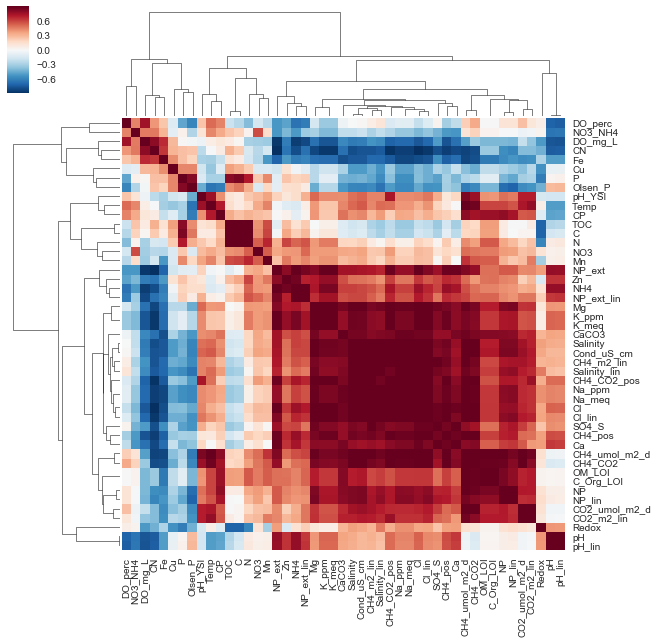

In [7]:
Sal_env_rm = Sal_meta.iloc[:,11:]
Sal_env_coronly = Sal_env_rm.corr()
cm=sns.clustermap(Sal_env_coronly, vmax=0.8, row_cluster=True, col_cluster=True, 
             square=False, figsize = (10,10));          # , figsize = (10,20))         
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)   # rotate ticks
plt.show() 

In [8]:
Sal_meta.columns


Index([u'New_index', u'Sample_name', u'Sample', u'Site', u'Core', u'Depth',
       u'Restoration', u'Hydrol', u'Date', u'Lat', u'Long', u'Salinity',
       u'Cond_uS_cm', u'Temp', u'DO_perc', u'DO_mg_L', u'Redox', u'pH_YSI',
       u'CH4_umol_m2_d', u'CO2_umol_m2_d', u'CH4_CO2', u'CH4_pos',
       u'CH4_CO2_pos', u'pH', u'Cl', u'SO4_S', u'TOC', u'OM_LOI', u'C_Org_LOI',
       u'CaCO3', u'C', u'N', u'P', u'CN', u'CP', u'NP', u'NO3', u'NH4',
       u'Olsen_P', u'NP_ext', u'NO3_NH4', u'K_ppm', u'K_meq', u'Na_ppm',
       u'Na_meq', u'Ca', u'Mg', u'Zn', u'Mn', u'Cu', u'Fe', u'CH4_m2_lin',
       u'CO2_m2_lin', u'Salinity_lin', u'pH_lin', u'NP_ext_lin', u'NP_lin',
       u'Cl_lin'],
      dtype='object')

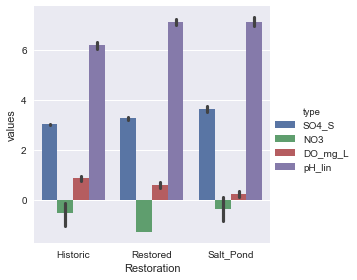

In [9]:
#sns.boxplot(x="Restoration", y="CH4_m2_lin", data=Sal_meta, palette="PRGn")
#sns.boxplot(x="Restoration", y="Salinity", data=Sal_meta, palette="PRGn")

#sns.boxplot(x="Restoration", y="SO4_S", data=Sal_meta, palette="PRGn")
#sns.boxplot(x="Restoration", y="NO3", data=Sal_meta, palette="PRGn")
#sns.boxplot(x="Restoration", y="DO_mg_L", data=Sal_meta, palette="PRGn")
#sns.boxplot(x="Restoration", y="pH_lin", data=Sal_meta, palette="PRGn")
a_list =["SO4_S","NO3","DO_mg_L","pH_lin"]
def concat_columns(a_list):
    frames = [ Sal_meta[["Restoration",each]] for each in a_list ]
    for a in frames:
        a["type"] = a.columns[1]
        a.columns = ["Restoration","values","type"] 

    return pd.concat(frames)
df_CH4sal = concat_columns(a_list)
df_CH4sal
sns.factorplot(x="Restoration", y="values", hue="type",data=df_CH4sal, kind="bar")

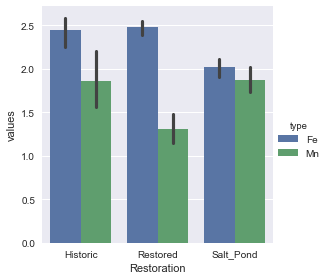

In [10]:
sns.factorplot(x="Restoration", y="values", hue="type",data=concat_columns(["Fe","Mn"]), kind="bar")


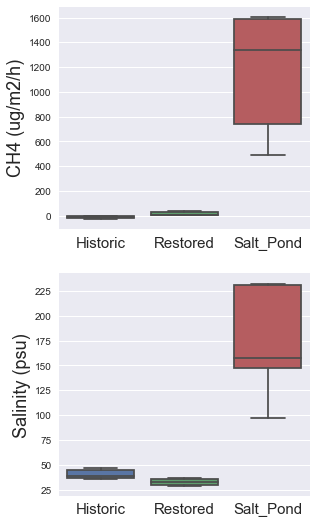

In [11]:
dft = Sal_meta[["Restoration","CH4_m2_lin","Salinity_lin"]]
#sns.pairplot(x_vars=["Restoration"],y_vars=["CH4_m2_lin","Salinity_lin"],data=Sal_meta)
#g = sns.factorplot(x="values", y="Restoration", col="type", data=dft,kind="box",col_wrap=2)
fig, axes = plt.subplots(2,1,figsize=(4.5,9))
ax1 = sns.boxplot(x="Restoration", y="CH4_m2_lin",data=dft,ax=axes[0])
ax1.set_xlabel("")
ax1.set_ylabel("CH4 (ug/m2/h)",fontsize=18)
ax1.tick_params(axis='x', which='major', labelsize=15)
ax2 = sns.boxplot(x="Restoration", y="Salinity_lin",data=dft,ax=axes[1])
ax2.set_xlabel("")
ax2.set_ylabel("Salinity (psu)",fontsize=18)
ax2.tick_params(axis='x', which='major', labelsize=15)

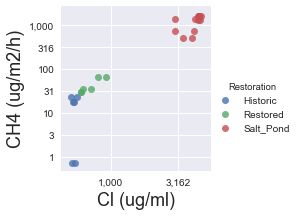

In [12]:
sns.lmplot(x='Cl',y='CH4_pos',data=Sal_meta,hue='Restoration',fit_reg=False,size=3)
#plt.ylim([1, 3.4188381812483177])
plt.gca().set_yticklabels(['{:,}'.format(int(10**x)) for x in plt.gca().get_yticks()]) 
plt.gca().set_xticklabels(['{:,}'.format(int(10**x)) for x in plt.gca().get_xticks()]) 
plt.xlabel("Cl (ug/ml)", fontsize=18)
plt.ylabel("CH4 (ug/m2/h)",fontsize=18)


In [13]:
2**20

1048576

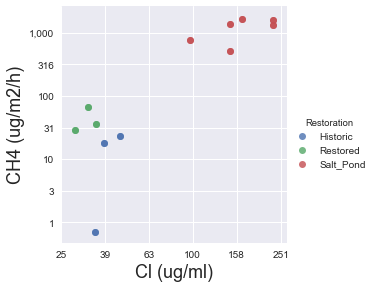

In [14]:
sns.lmplot(x='Salinity',y='CH4_pos',data=Sal_meta,hue='Restoration',fit_reg=False,size=4)
plt.gca().set_yticklabels(['{:,}'.format(int(10**x)) for x in plt.gca().get_yticks()]) 
plt.gca().set_xticklabels(['{:,}'.format(int(10**x)) for x in plt.gca().get_xticks()]) 
plt.xlabel("Cl (ug/ml)", fontsize=18)
plt.ylabel("CH4 (ug/m2/h)",fontsize=18)

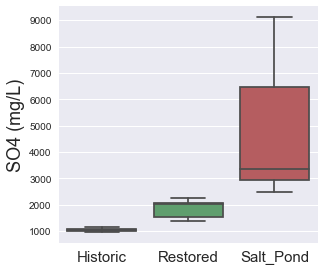

In [15]:
dfSO4 = concat_columns(["SO4_S"])
dfSO4["values"] = 10**dfSO4["values"]
plt.figure(figsize=(4.5,4))
sns.boxplot(x="Restoration", y="values",data=dfSO4)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.ylabel("SO4 (mg/L)",fontsize=18)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.xlabel("")

array([ 1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

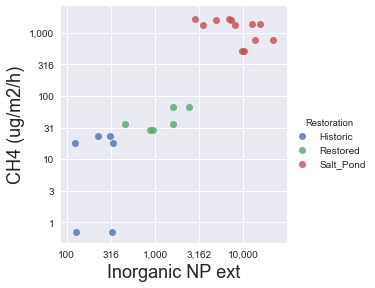

In [16]:
#sns.factorplot(x="Restoration", y="values", hue="type",data=concat_columns(["NP_ext"]), kind="bar")
#g = sns.pairplot(y_vars=["CH4_pos"], x_vars = ["NP_ext","Olsen_P"], hue='Restoration', data=Sal_meta,size=4)

#ax.get_yaxis().set_major_formatter(                                       # not scientific label
    #ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
sns.lmplot(y="CH4_pos", x = "NP_ext", hue='Restoration',fit_reg=False, data=Sal_meta,size=4)
#plt.yticks([-0.5,  0. ,  1. ,  2. ,  3.5])
#plt.xlim([1.5,5])
plt.gca().set_yticklabels(['{:,}'.format(int(10**x)) for x in plt.gca().get_yticks()]) 
plt.gca().set_xticklabels(['{:,}'.format(int(10**x)) for x in plt.gca().get_xticks()]) 
plt.xlabel("Inorganic NP ext", fontsize=18)
plt.ylabel("CH4 (ug/m2/h)",fontsize=18)
plt.gca().get_xticks()


## Import Gene abundance table(s)

In [18]:
# Import and clean table

# Not normalized (included gene names)
#Salt_pond_KO= pd.read_csv('Salt_pond_KO_ordered.txt', sep='\t', index_col=0)

# Get gene fxns (TODO, maybe not needed)

# DESeq2 normalized 
Salt_pond_KO_DSq = pd.read_csv('Salt_pond_KO_ordered_DESeq2.txt', sep='\t', index_col=0)


## ABSTRACTION  @@@@@@@@@@  ANNOT. Selector
Gene_abund = Salt_pond_KO_DSq                     ## MG_RAST_KO SELECT
del Gene_abund.index.name   # Drop row index name before transpose
Gene_abundT = Gene_abund.T  # TRANSPOSE, samples as rows for join with ENV# Gene_abundT.head()

# Gene_abundT.head() 
# Gene_list = Gene_abundT.columns  # Get gene list (for later)  -- acting wonky, no methods could be use
# mgRAST_KO_de
(2 ** Gene_abundT)

,K00001,K00002,K00003,K00004,K00005,K00006,K00007,K00008,K00009,K00010,...,K19778,K19781,K19783,K19784,K19785,K19787,K19788,K19789,K19791,K19792
R2A_A_D1,2791.838940,366.787331,1847.040775,385.503460,172.338354,47.304319,31.831870,1527.545883,190.295812,1016.433419,...,11.114722,11.114722,35.280522,388.131039,11.114722,24.253146,31.831870,236.664581,11.114722,11.114722
R2A_A_D2,2594.066952,239.453216,1797.779042,345.442074,129.239208,15.920348,67.340382,1584.706553,133.611465,1013.267938,...,11.234002,11.234002,45.232882,357.524922,39.159760,15.920348,50.759291,260.474801,24.658275,11.234002
R2A_B_D1,2902.338348,232.695580,1797.779042,365.923941,181.270456,48.573583,45.433987,1475.512063,135.486003,1046.241365,...,11.803968,11.803968,57.194321,374.131078,17.006331,17.006331,34.886573,272.535433,26.584253,11.803968
R2A_B_D2,2052.263127,199.010398,1748.618679,426.351641,258.603860,38.945912,38.945912,2072.275356,218.441022,805.421403,...,17.136493,11.872896,35.182839,372.294373,11.872896,11.872896,38.945912,332.267183,35.182839,11.872896
R2A_C_D1,2674.400844,194.509930,2022.606564,407.032448,264.917621,26.741343,101.469336,1645.146105,124.672546,989.050243,...,11.851518,11.851518,48.843680,448.076111,31.066763,11.851518,45.689793,278.667317,42.364972,11.851518
R2A_C_D2,2447.341988,199.037988,1955.063837,444.518607,314.910925,21.282563,44.072291,1983.730052,280.372298,947.446060,...,11.555438,11.555438,25.749991,491.041109,25.749991,11.555438,33.796455,309.758487,58.133586,16.532122
SF2_A_D1,2065.105828,345.825394,1637.183141,479.006028,320.793255,52.531104,63.579951,2270.823718,228.460351,784.919015,...,11.964598,11.964598,22.387166,177.650754,22.387166,22.387166,49.491196,289.415825,11.964598,11.964598
SF2_A_D2,2510.919393,308.751000,1896.337454,558.030436,395.490711,20.879279,51.886956,2813.207006,261.234205,939.728374,...,36.709969,11.405834,25.246299,238.360274,16.248110,16.248110,43.246156,345.154863,11.405834,11.405834
SF2_B_D1,2551.270227,473.165147,2105.577117,649.011396,376.420137,11.872896,45.807121,2815.157649,269.081613,915.934105,...,22.140256,11.872896,35.182839,233.406350,11.872896,11.872896,38.945912,371.263583,17.136493,11.872896
SF2_B_D2,2674.400844,479.304940,2323.364833,684.022514,401.456538,48.901269,31.105548,2866.351853,283.538336,853.945389,...,11.861380,11.861380,38.891959,259.411747,17.113940,17.113940,38.891959,416.652261,26.774728,11.861380


## Import ontology 

# New ontology IMPORT

In [23]:
# Import NPS genes  -- ORIGINAL IMPORT
# NPS_KO = pd.read_csv('CNPS_CH4_KOs_WHH_Aug_2017.txt', sep='\t')
# NPS_KO = NPS_KO.iloc[:,:8]

# Import CNPS, CH4, Ferment genes
CNPSch4_Fm_KO = pd.read_csv('Ontology_KO_CNPSch4_Fm_whh0.txt', sep='\t', index_col=0)
CNPSch4_Fm_KO

### ABSTRACTION ### call gene_ontol
gene_ontol = CNPSch4_Fm_KO

# Check size, unique labels
gene_ontol.shape            # 527
gene_ontol.columns 
len(gene_ontol.mid_name.unique()) 
mid_u = gene_ontol.mid_name.unique() 
len(gene_ontol.mid_name.unique()) # 526, one repeated...not bad

# Make new sort and index vars
x = pd.Series(range(1,len(gene_ontol),1))    # create series 1:n
s =x.astype(str)                             # make string
gene_ontol['KO_order'] = x                   # num for sort
gene_ontol['KO_order_S'] = s               # num string for print                       # gene_ontol.shape
gene_ontol.head()
#gene_ontol.columns

########################
## ADD Abbrev. NAMES
Ont = gene_ontol         # Rename Ont shorter
gene_ontol['sm_name'] = (Ont['KO']+ " " + Ont['L3'] + " " + Ont['gene'].str[:4])
gene_ontol['mid_name'] = (Ont['KO']+ " " + Ont['L3'] + " ( " + Ont['gene'].str[:4] + " ) " + Ont['fxn'].str[:18])
# gene_ontol.tail()

In [24]:
### Import Gene colors
gene_colors = pd.read_csv('Ontol_KO_L2_Color_KEY_whh0.txt', sep='\t', index_col=0)         
# gene_colors = gene_colors.iloc[:,4:6]                                  # why not keep it all and drop later?        # get L3 colors and cats    # gene_colors

#### Merge colors, Ontol
gene_ontol_colors = pd.merge(gene_ontol, gene_colors, on = 'L2', how='inner')  # Here changed to L2
# gene_colors.head()
# gene_ontol_colors
gene_colors

,L2,color
0,Sugars,#e94c3e
1,Polymers,#b8302a
2,Aromatic,#5f3230
3,Denitrification,#93ce81
4,NO3_reduction,#6bb96d
5,NH3_oxidation,#41a359
6,NO3_A.reduction,#36854d
7,NH4_assimilation,#356542
8,N2_fixation,#344338
9,P_transport,#4e96c8


## Subset Ontology

In [25]:
### Get gene cycle subsets
gene_ontol_colors.head()
gene_ontol_colors.L1.unique()

Carbon = gene_ontol_colors[gene_ontol_colors['L1'].str.contains('Carbon')]             # L1 = Carbon 
Nitrogen = gene_ontol_colors[gene_ontol_colors['L1'].str.contains('Nitrogen')]         # L1 = Nitrogen
Phosphorus = gene_ontol_colors[gene_ontol_colors['L1'].str.contains('Phosphorus')]     # L1 = Phosphorus
Sulfur = gene_ontol_colors[gene_ontol_colors['L1'].str.contains('Sulfur')]             # L1 = Sulfur
CH4_cycling = gene_ontol_colors[gene_ontol_colors['L1'].str.contains('CH4_cycling')]   # L1 = CH4 
Fermentation = gene_ontol_colors[gene_ontol_colors['L1'].str.contains('Fermentation')] # L1 = Fermentaiton

NPS_CH4_LIST = [Nitrogen, Phosphorus, Sulfur, CH4_cycling]
# NPS_CH4 = pd.concat([NPS_CH4_LIST], 0) 

NPS_CH4 = pd.concat([Nitrogen, Phosphorus, Sulfur, CH4_cycling], 0) 

# gene_ontol_colors.tail()

# @@@@@@@@@@@@@@@@@@@
# Select Gene ONTOL by cycle 

In [26]:
#   [[[ ON / OFF ]]]            # by commenting out -- NOTE Sequence will matter if [[[ ON ]]]

# gene_ontol_colors = Nitrogen
# gene_ontol_colors = CH4_cycling
gene_ontol_colors = NPS_CH4

gene_ontol_colors.L1.unique()   # gene_ontol_colors.L2.unique()

array(['Nitrogen', 'Phosphorus', 'Sulfur', 'CH4_cycling'], dtype=object)

# @@@@@@@@@@@@@@@@@@
# Set Correlation Cutoff Params

In [27]:
# SET global CORRELATION CUTOFFS: 
# DEF parameters: Out_var, cutoff 

### OUT_VAR - variable to cut off on
# out_var = 'Salinity'  
# out_var = 'Cl' 

out_var = 'CH4_pos'
# out_var = 'CH4_umol_m2_d' 

# out_var = 'CH4_m2_lin' 
# out_var = 'CO2_mg_m2_h'  
# out_var = 'DOC_mg_L'  
# out_var = 'C'  
# out_var = 'N_g_m2'  

###  r_cut - correlation CUTOFF value
r_cut = 0.5        # corr coefficient cutoff (abs. val.) 

## FIG SIZE
figdim = (10,10)           # plot size

out_var

'CH4_pos'

# @@@@@@@@@@@@@@@@@@
# RUN script below

### PROCESS DATA for Heatmap
1): Join [Genes, Env], corr. subset;

2): Merge [Genes, Env] with [Gene Ontology / Colors]

3): Cutoff subset

4): Get data matrix, colors for heatmap

### PLOT heatmap after proc. data

In [28]:
### 1) Make [Genes, Env] Correlation matrix:  merge, corr, subset NR
Gene_abundT = Gene_abund.T                                    # Transpose before join
Genes_env = Env_chem.join(Gene_abundT, how='right')           # JOIN genes and metadata
Genes_env_corr = Genes_env.corr(method='spearman')                             # Make CORR matrix

# Subset Corr matrix by [Genes, Env]                           
n_enVars = len(env_chem_List)                                 # get n Env_vars
Genes_env_CORR = Genes_env_corr.iloc[n_enVars:,:n_enVars]     # reduce Corr.M to include only [Genes, Env] 

### Merge [Genes, Env] corretlation matrix with Gene ontology 
# Prep corr matrix, set KO col, drop index
Genes_env_CORR['KO']= Genes_env_CORR.index                  # M1: Set KO as column, drop index
Genes_env_CORr = Genes_env_CORR.reset_index(drop=True)      # Drop index      
Genes_env_CORr.head() # Genes_env_CORr.shape


,Salinity,Cond_uS_cm,Temp,DO_perc,DO_mg_L,Redox,pH_YSI,CH4_umol_m2_d,CO2_umol_m2_d,CH4_CO2,...,Mg,Zn,Mn,Cu,Fe,CH4_m2_lin,CO2_m2_lin,Salinity_lin,pH_lin,KO
0,0.231089,0.196207,-0.105516,-0.224984,-0.320908,-0.156923,0.187487,0.211511,0.372806,0.295863,...,0.295563,0.475963,0.351381,-0.017636,-0.412698,0.287771,0.272946,0.231089,0.266638,K00001
1,0.455102,0.442896,-0.104621,-0.380123,-0.700961,-0.053255,0.402791,0.510114,0.514304,0.355036,...,0.673625,0.782949,0.332174,-0.073139,-0.473043,0.673062,0.517874,0.455102,0.554468,K00002
2,0.067146,-0.012208,-0.286899,-0.275562,-0.229344,-0.183435,-0.059298,0.194922,0.273089,0.165683,...,0.156590,0.426800,0.094803,0.131940,-0.184823,0.298235,0.224112,0.067146,0.204002,K00003
3,-0.503925,-0.556236,-0.608546,-0.369661,0.052311,0.236691,-0.688756,-0.572323,-0.566415,-0.390539,...,-0.326158,0.023923,-0.346957,0.167175,0.408696,-0.228423,-0.613777,-0.503925,0.158295,K00004
4,0.003487,-0.095903,-0.606802,-0.596340,-0.521362,0.355036,-0.278990,-0.136860,0.081564,-0.082842,...,0.168297,0.534580,-0.020870,-0.007836,-0.109565,0.390585,-0.013949,0.003487,0.536638,K00005


In [29]:
#Genes_env.corr(method='spearman')
Gene_abund_counts = (2 ** Gene_abund)#.sum()
Gene_abund_counts2 = Gene_abund_counts[Gene_abund_counts.sum(1) > 500]
noLow_abun_ko = Gene_abund_counts2.index

#mcrABC counts
#Gene_abund_counts.loc[["K00399","K00401","K03421"]].sum(1)

In [58]:
# MERGE on KO, while keeping duplicates, drop NA
Genes_env_ontol_Corr= pd.merge(gene_ontol_colors, Genes_env_CORr, on = 'KO', how='left')    #  Merge
#Genes_env_ontol_Corr = Genes_env_ontol_Corr.dropna(how='all', subset= env_chem_List)        # Drop NA in Env by index
# Genes_env_ontol_Corr.iloc[:,:20]
#Genes_env_ontol_Corr.dropna(how='all', subset= env_chem_List)
del env_chem_List[11]

In [59]:
### 2) Merge [Genes, Env] with [Gene Ontology/colors]

# MERGE on KO, while keeping duplicates, drop NA
Genes_env_ontol_Corr= pd.merge(gene_ontol_colors, Genes_env_CORr, on = 'KO', how='left')    #  Merge
Genes_env_ontol_Corr = Genes_env_ontol_Corr.dropna(how='all', subset= env_chem_List)        # Drop NA in Env by index
# Genes_env_ontol_Corr.iloc[:,:20]

# RE-INDEX matrix by GENE NAMES -- must be unique, here MID_NAME
Genes_env_ontol_CorN = Genes_env_ontol_Corr.reset_index(drop=True)    # Drop index           
Genes_env_ontol_CorN = Genes_env_ontol_Corr.set_index('mid_name',0)   # RENAME index: Needs UNIQUE index, hence L3 
del Genes_env_ontol_CorN.index.name                                   # delete index name     
Genes_env_ontol_CorN.head()

,L1,L2,L3,L4,KO,gene,fxn,EC,sm_name,mid_name,...,Ca,Mg,Zn,Mn,Cu,Fe,CH4_m2_lin,CO2_m2_lin,Salinity_lin,pH_lin
K00368 N_DNT ( nirK ) nitrite reductase,Nitrogen,Denitrification,N_DNT,NaN,K00368,nirK,nitrite reductase (NO-forming),[EC:1.7.2.1],K00368 N_DNT nirK,K00368 N_DNT ( nirK ) nitrite reductase,...,0.152207,0.321809,0.459765,0.471304,0.124510,-0.373043,0.204011,0.421972,0.360943,0.057839
K15864 N_DNT ( nirS ) nitrite reductase,Nitrogen,Denitrification,N_DNT,NaN,K15864,nirS,nitrite reductase (NO-forming) / hydroxylamine...,[EC:1.7.2.1 1.7.99.1],K15864 N_DNT nirS,K15864 N_DNT ( nirS ) nitrite reductase,...,-0.670146,-0.620135,-0.226185,0.021739,0.169351,0.426957,-0.627727,-0.540542,-0.775940,0.007828
K04561 N_DNT ( norB ) nitric oxide reduc,Nitrogen,Denitrification,N_DNT,NaN,K04561,norB,nitric oxide reductase subunit B,[EC:1.7.2.5],K04561 N_DNT norB,K04561 N_DNT ( norB ) nitric oxide reduc,...,-0.481409,-0.397043,-0.103958,0.081739,0.305616,0.216522,-0.470795,-0.357455,-0.366174,-0.243966
K02305 N_DNT ( norC ) nitric oxide reduc,Nitrogen,Denitrification,N_DNT,NaN,K02305,norC,nitric oxide reductase subunit C,NaN,K02305 N_DNT norC,K02305 N_DNT ( norC ) nitric oxide reduc,...,0.117417,0.494890,0.619400,0.721739,-0.020461,-0.482609,0.327813,0.496950,0.360943,0.279626
K15877 N_DNT ( CYP5 ) fungal nitric oxid,Nitrogen,Denitrification,N_DNT,NaN,K15877,CYP55,fungal nitric oxide reductase,[EC:1.7.1.14],K15877 N_DNT CYP5,K15877 N_DNT ( CYP5 ) fungal nitric oxid,...,0.415815,0.515838,0.284843,-0.051092,0.048535,-0.351532,0.358144,0.269703,0.409808,0.275827


In [60]:
### 3) get CUTOFF data
# Make Absolute Value var
abs_var = "abs_"+ out_var     
abs_var

# append Abs. Value to matrix
Genes_env_ontol_CorN[abs_var] = abs(Genes_env_ontol_CorN[out_var])  
Genes_env_ontol_CorN.head()  # Genes_env_ontol_Corr.shape

# Cutoff at data |r| > cut                                                              
# Print string with abs_var, exec -- abstraction workaround
Cut_CALL = 'Genes_env_ontol_Corr_cut = Genes_env_ontol_CorN[Genes_env_ontol_CorN.'+ abs_var +' > r_cut]'
Cut_CALL
exec(Cut_CALL)    # Genes_env_ontol_Corr_cut

In [61]:
### 4) Get data ONLY Matrix
### Make data only matrix for heatmap
n_ontol = len(gene_ontol_colors.columns)                         # get length of onotlogy map - to subtract 
Genes_env_ontol_CorrM = Genes_env_ontol_Corr_cut.iloc[:,n_ontol:]   # Drop onlology variables 
Genes_env_ontol_CorrM = Genes_env_ontol_CorrM.iloc[:,1:]         # Drop new KO column, was index in ontology
Genes_env_ontol_CorrM = Genes_env_ontol_CorrM.iloc[:,:-1]        # Drop column w abs. val

gene_colors = Genes_env_ontol_Corr_cut['color']                     # Gets gene colors --- Changed from L3 in initial
Genes_env_ontol_CorrM["CH4_pos"].sort_values(ascending=False)

K00399 CH4_Archa ( mcrA ) methyl-coenzyme M        0.788489
K00580 CH4_Archa ( mtrD ) tetrahydromethanop       0.785701
K14082 CH4_methylam ( mtbA ) [methyl-Co(III) me    0.773493
K01514 P_PolyPase ( PRUN ) exopolyphosphatase      0.772453
K00582 CH4_Archa ( mtrF ) tetrahydromethanop       0.764939
K00579 CH4_Archa ( mtrC ) tetrahydromethanop       0.752727
K00583 CH4_Archa ( mtrG ) tetrahydromethanop       0.749239
K15986 P_PyroP ( ppaC ) manganese-dependen         0.741066
K00578 CH4_Archa ( mtrB ) tetrahydromethanop       0.740355
K03385 NO3_D.red ( nrfA ) nitrite reductase        0.730604
K00260 NH4_asim ( gudB ) glutamate dehydrog        0.716655
K00581 CH4_Archa ( mtrE ) tetrahydromethanop       0.712450
K00402 CH4_Archa ( mcrG ) methyl-coenzyme M        0.709680
K00401 CH4_Archa ( mcrB ) methyl-coenzyme M        0.704602
K15876 NO3_D.red ( nrfH ) cytochrome c nitri       0.648792
K06162 P_CH3_Phn ( phnM ) alpha-D-ribose 1-m       0.641676
K01499 CH4_H2.red ( mch ) methenyltetrah

In [62]:
Genes_env_ontol_CorrM["CH4_umol_m2_d"].sort_values(ascending=False)

K06162 P_CH3_Phn ( phnM ) alpha-D-ribose 1-m       0.763098
K15986 P_PyroP ( ppaC ) manganese-dependen         0.729920
K06164 P_CH3_Phn ( phnI ) alpha-D-ribose 1-m       0.680153
K06165 P_CH3_Phn ( phnH ) alpha-D-ribose 1-m       0.680153
K06166 P_CH3_Phn ( phnG ) alpha-D-ribose 1-m       0.630385
K06163 CH3_Phn ( phnJ ) alpha-D-ribose 1-m         0.626238
K06163 P_CH3_Phn ( phnJ ) alpha-D-ribose 1-m       0.626238
K05780 P_CH3_Phn ( phnL ) alpha-D-ribose 1-m       0.613796
K03385 NO3_D.red ( nrfA ) nitrite reductase        0.597207
K00260 NH4_asim ( gudB ) glutamate dehydrog        0.593060
K02042 P_Phn ( phnE ) phosphonate transp           0.588913
K02041 P_Phn ( phnC ) phosphonate transp           0.572323
K00580 CH4_Archa ( mtrD ) tetrahydromethanop       0.572323
K06167 P_CH3_Phn ( phnP ) phosphoribosyl 1,2       0.564029
K00625 CH4_acetat ( E2.3 ) phosphate acetyltr      0.539145
K01514 P_PolyPase ( PRUN ) exopolyphosphatase      0.526704
K00582 CH4_Archa ( mtrF ) tetrahydrometh

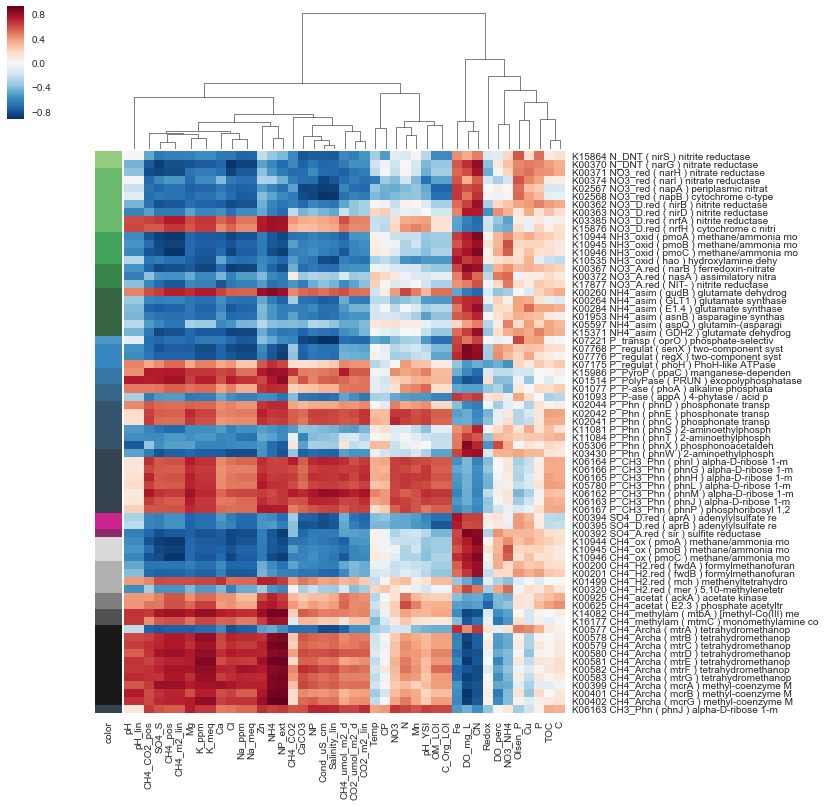

In [73]:
Genes_env_ontol_CorrM_5 = Genes_env_ontol_CorrM[abs(Genes_env_ontol_CorrM["CH4_pos"]) > 0.5]
cm=sns.clustermap(Genes_env_ontol_CorrM_5, vmax=0.8, row_cluster=False, col_cluster=True, 
             square=False, row_colors=gene_colors, figsize = (10,13));          # , figsize = (10,20))         
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)   # rotate ticks
plt.show()    

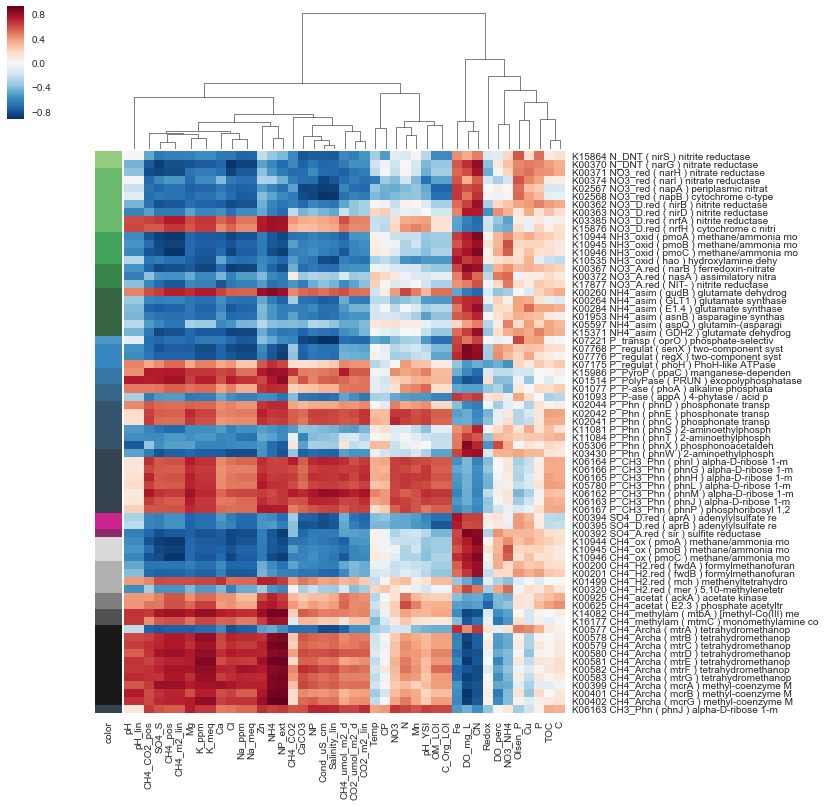

In [43]:
### 5) PLOT heatmap

# PLOTTING Params
# plt.rcParams["figure.figsize"] = (8, 4)
# figdim = (10,10)     # wonky?
# fig.set_size_inches(11.7, 8.27)

cm=sns.clustermap(Genes_env_ontol_CorrM, vmax=0.8, row_cluster=False, col_cluster=True, 
             square=False, row_colors=gene_colors, figsize = (10,13));          # , figsize = (10,20))         
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)   # rotate ticks
plt.show()                  
# plt.sca(cm.ax_heatmap) # More on this in a minute
# plt.yticks(rotation=0)

In [44]:
#Genes_env_ontol_CorrM


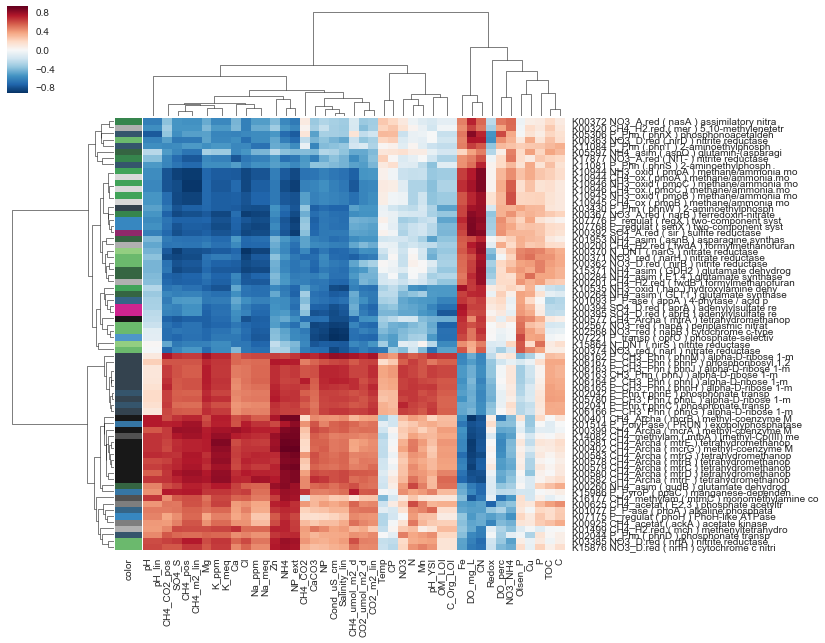

In [45]:
### 5) PLOT heatmap

# PLOTTING Params
# plt.rcParams["figure.figsize"] = (8, 4)
# figdim = (10,10)     # wonky?
# fig.set_size_inches(11.7, 8.27)

cm=sns.clustermap(Genes_env_ontol_CorrM, vmax=0.8, row_cluster=True, col_cluster=True, 
             square=False, row_colors=gene_colors, figsize = (figdim));          # , figsize = (10,20))         
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)   # rotate ticks
plt.show()                  
# plt.sca(cm.ax_heatmap) # More on this in a minute
# plt.yticks(rotation=0)

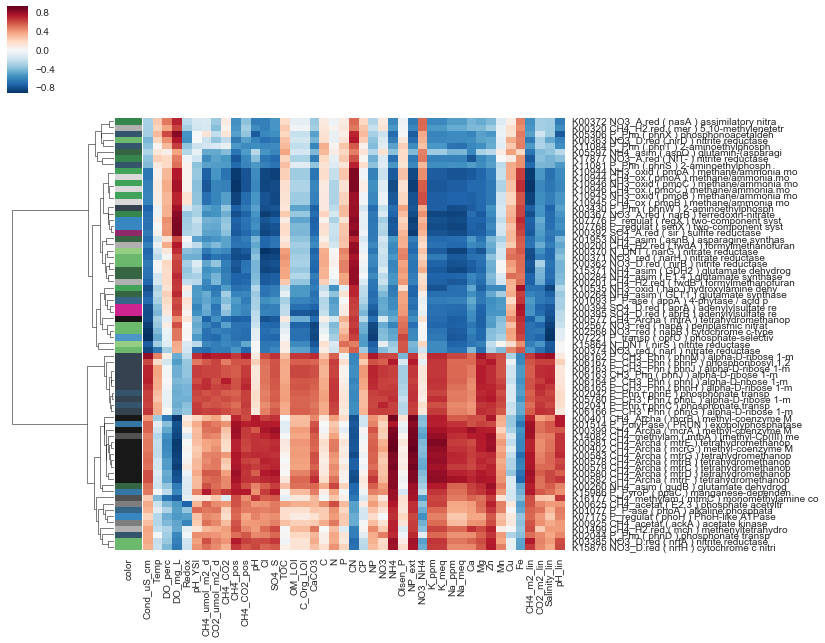

In [46]:
### 5) PLOT heatmap

# PLOTTING Params
# plt.rcParams["figure.figsize"] = (8, 4)
# figdim = (10,10)     # wonky?
# fig.set_size_inches(11.7, 8.27)

cm=sns.clustermap(Genes_env_ontol_CorrM, vmax=0.8, row_cluster=True, col_cluster=False, 
             square=False, row_colors=gene_colors, figsize = (figdim));          # , figsize = (10,20))         
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)   # rotate ticks
plt.show()                  
# plt.sca(cm.ax_heatmap) # More on this in a minute
# plt.yticks(rotation=0)

# GET BEST CORRs

In [47]:
# Genes_env_ontol_Corr_cut.head()                      # Starting point from corr matrix
out_varS = ['KO', out_var, abs_var]                    # List vars to get          
corr_out_varS = Genes_env_ontol_Corr_cut[out_varS]     # get vars from CORR MTX

## Sort by abs
# corr_out_varSabs = corr_out_varS.sort_values(by=out_var, ascending =0)    # make abs col
# corr_out_varSabs

## Sort by corr +/-
corr_out_varSout_PLUS= corr_out_varS.sort_values(by=out_var, ascending =0)    # make abs col

# Get 5 most pos/most neg
Max_corr5 = corr_out_varSout_PLUS.head(5)  # 5 largest
Min_corr5 = corr_out_varSout_PLUS.tail(5)  # 5 smallest 

# Combine Top 10
top10 = [Max_corr5, Min_corr5]             # Make list
Top10_data = pd.concat(top10)              # Concat list
# Top10_data

##### Get TOP 10 GENES                     # May not need, redo at end?
# Top10_genes = Top10_data.index
# Top10_genes
# corr_out_varSout_PLUS

# PLOT TOP 10 VARS

###  Modified to accomodate short names for plots

In [48]:
# Prepare plots
# Site_or = ('Sandmound','WestPond','Mayberry','Browns','RushRanch','Joice','Goodyear','WhiteSlough','Tolay','ChinaCamp','Muzzi')

## Get environment Metadata                                         # Sal_meta.columns # metacols = ['Sample','Location']
metacols = ['New_index', 'Sample_name', 'Sample', 'Site', 'Core', 'Depth',
       'Restoration', 'Hydrol']

Metadata = Sal_meta[metacols]                                       # Note SAL_META here, not env, was dropped 
Metadata.set_index('Sample', inplace=True)                          # added back samp indexes 
del Metadata.index.name                                             # drop index name    

#### Rename GENEs in Gene_abund         Gene_abund.head()
Gene_abundN = Gene_abund.copy()                                     # Makes copy 
Gene_abundN['KO'] = Gene_abundN.index                               # Get KO from index
Gene_abundN = Gene_abundN.reset_index(drop=True)                    # Drop index

# Merge with TOP 10 by KO
# Gene_abundN.head() 

In [49]:
# get SMALL names for scatterplots                           #gene_ontol_colors.head()
names = ['sm_name', 'mid_name']                               # get name translation list 
rename = gene_ontol_colors[names]                             # get sm_name, mid_name DF 
sm_name = rename.set_index('mid_name')                        # del sm_name.index.name # sm_name

# Get Top 10 KOs, with Corr.
getvars = ['KO',out_var]
# Top_10_KOs = pd.DataFrame(Top10_data[getvars])                                 # DEFUNCT  # Get top 10 KOs, index
Top_10_KOs = Top10_data[getvars]

# Top_10_KOs_renamer
Top_10_KOs_rename = Top_10_KOs.join(sm_name)                  # Join with Top 10 KOs
Top_10_KOs_sm_name = Top_10_KOs_rename.set_index('sm_name')   # Reset index 
del Top_10_KOs_sm_name.index.name                             # Del index name   
Top_10_KOs_smN = Top_10_KOs_sm_name                           # shorten var

In [50]:
# Merge TOP 10 with Gene_abund, by KO
Gene_abund_top10 = pd.merge(Top_10_KOs_smN, Gene_abundN, on='KO', how='left') # Merge with Gene_abund
Gene_abund_top10.index = Top_10_KOs_smN.index                                 # Reindex
Gene_abund_top10 = Gene_abund_top10.iloc[:,2:]                                # Drop KOs, corr

# Transpose and Rejoin with Environ data (including meta)
Gene_abund_top10T = Gene_abund_top10.T 

## Join Meta with samples / genes                                             # with prior [Genes x Env matrix]  # Genes_env.head()
Env_gene_abund_Top10 = Genes_env.join(Gene_abund_top10T, how='right')         # JOIN Top genes with soil chem.
Meta_Env_gene_abund_Top10 = Metadata.join(Env_gene_abund_Top10, how = 'left') # Join metadata  

# Top 10 variable scatterplots

In [51]:
# Prepare plots
# Top 10 needs sorting after several merges
Top_10_KOs_smN.columns = ['KO','Corr']                                    # Rename abstract var
Top_10_KOs_smN = Top_10_KOs_smN.sort_values('Corr',0, ascending=False)    # Sort by corr

# Get just list of genes for plots
Top10_genes = Top_10_KOs_smN.index

# Color params:
# sns.set_style("white")
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

Top10_genes
Top_10_KOs_smN
Top_10_KOs

,KO,CH4_pos
K00399 CH4_Archa ( mcrA ) methyl-coenzyme M,K00399,0.788489
K00580 CH4_Archa ( mtrD ) tetrahydromethanop,K00580,0.785701
K14082 CH4_methylam ( mtbA ) [methyl-Co(III) me,K14082,0.773493
K01514 P_PolyPase ( PRUN ) exopolyphosphatase,K01514,0.772453
K00582 CH4_Archa ( mtrF ) tetrahydromethanop,K00582,0.764939
K10945 CH4_ox ( pmoB ) methane/ammonia mo,K10945,-0.852030
K10944 NH3_oxid ( pmoA ) methane/ammonia mo,K10944,-0.884625
K10944 CH4_ox ( pmoA ) methane/ammonia mo,K10944,-0.884625
K10946 NH3_oxid ( pmoC ) methane/ammonia mo,K10946,-0.896657
K10946 CH4_ox ( pmoC ) methane/ammonia mo,K10946,-0.896657


###  by LOCATION

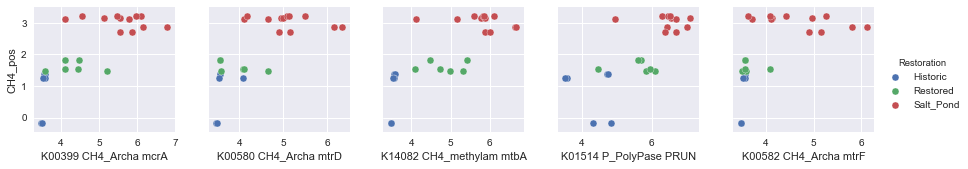

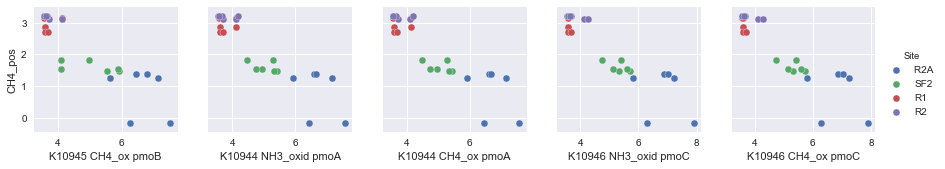

In [52]:
sns.pairplot(y_vars=[out_var], x_vars = Top10_genes[0:5], hue='Restoration', data=Meta_Env_gene_abund_Top10)
sns.pairplot(y_vars=[out_var], x_vars = Top10_genes[5:11], hue='Site', data=Meta_Env_gene_abund_Top10)
# Top10_genes

### By DEPTH

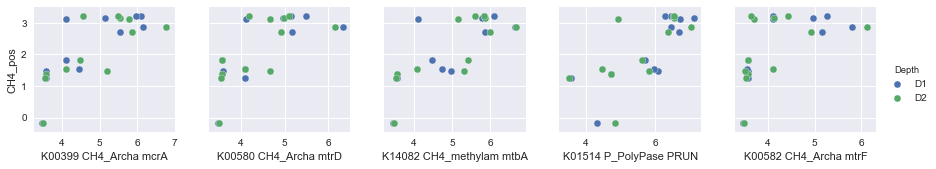

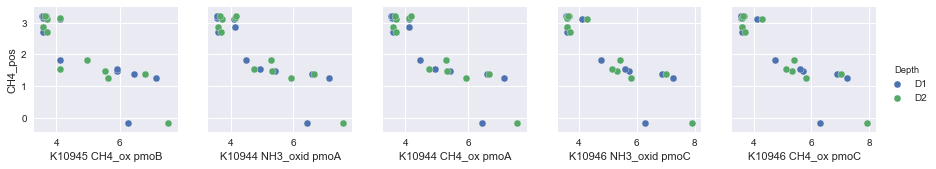

In [53]:
# Prepare plots
sns.pairplot(y_vars=[out_var], x_vars = Top10_genes[0:5], hue='Depth', data=Meta_Env_gene_abund_Top10)
sns.pairplot(y_vars=[out_var], x_vars = Top10_genes[5:11], hue='Depth', data=Meta_Env_gene_abund_Top10)

In [54]:
Meta_Env_gene_abund_Top10

,New_index,Sample_name,Site,Core,Depth,Restoration,Hydrol,Salinity,Cond_uS_cm,Temp,...,K00399 CH4_Archa mcrA,K00580 CH4_Archa mtrD,K14082 CH4_methylam mtbA,K01514 P_PolyPase PRUN,K00582 CH4_Archa mtrF,K10945 CH4_ox pmoB,K10944 NH3_oxid pmoA,K10944 CH4_ox pmoA,K10946 NH3_oxid pmoC,K10946 CH4_ox pmoC
R2A_A_D1,1,Historic_R2A_A_D1,R2A,A,D1,Historic,Tidal marsh,1.556303,4.754646,1.436163,...,3.4744,3.4744,3.4744,4.3281,3.4744,6.2561,6.4518,6.4518,6.2919,6.2919
R2A_A_D2,2,Historic_R2A_A_D2,R2A,A,D2,Historic,Tidal marsh,1.556303,4.754646,1.436163,...,3.4898,3.4898,3.4898,4.8399,3.4898,7.5310,7.5772,7.5772,7.9036,7.9036
R2A_B_D1,3,Historic_R2A_B_D1,R2A,B,D1,Historic,Tidal marsh,1.667453,4.842203,1.414973,...,3.5612,3.5612,3.5612,4.7325,3.5612,6.4467,6.6017,6.6017,6.8723,6.8723
R2A_B_D2,4,Historic_R2A_B_D2,R2A,B,D2,Historic,Tidal marsh,1.667453,4.842203,1.414973,...,3.5696,3.5696,3.5696,4.7449,3.5696,6.7941,6.6685,6.6685,7.0226,7.0226
R2A_C_D1,5,Historic_R2A_C_D1,R2A,C,D1,Historic,Tidal marsh,1.594393,4.780627,1.419956,...,3.5670,4.0955,3.5670,3.5670,3.5670,7.1559,7.1559,7.1559,7.2323,7.2323
R2A_C_D2,6,Historic_R2A_C_D2,R2A,C,D2,Historic,Tidal marsh,1.594393,4.780627,1.419956,...,3.5305,3.5305,3.5305,3.5305,3.5305,5.6454,5.9224,5.9224,5.7955,5.7955
SF2_A_D1,7,restored_SF2_A_D1,SF2,A,D1,Restored,Managed pond,1.463893,4.633630,1.357935,...,3.5807,3.5807,4.9775,6.1004,3.5807,5.9297,5.4243,5.4243,5.7151,5.7151
SF2_A_D2,8,restored_SF2_A_D2,SF2,A,D2,Restored,Managed pond,1.463893,4.633630,1.357935,...,5.1981,4.6580,5.3245,5.8352,3.5117,5.5317,5.3245,5.3245,5.3245,5.3245
SF2_B_D1,9,restored_SF2_B_D1,SF2,B,D1,Restored,Managed pond,1.522444,4.685043,1.356026,...,4.0990,3.5696,4.4686,5.6999,3.5696,4.0990,4.4686,4.4686,4.7449,4.7449
SF2_B_D2,10,restored_SF2_B_D2,SF2,B,D2,Restored,Managed pond,1.522444,4.685043,1.356026,...,4.4666,3.5682,5.4066,5.6118,3.5682,4.9591,5.2814,5.2814,5.4066,5.4066


In [55]:
Genes_env_ontol_CorrM.loc['K06163 P_CH3_Phn ( phnJ ) alpha-D-ribose 1-m'].sort_values()

CN              -0.570435
Fe              -0.533043
DO_mg_L         -0.449871
Redox           -0.366870
Olsen_P         -0.320070
Cu              -0.188072
DO_perc         -0.026155
P                0.030917
pH               0.108719
pH_lin           0.108719
NO3_NH4          0.109565
C                0.321444
TOC              0.348696
Temp             0.360943
CP               0.398261
Ca               0.482279
Cl               0.492281
Na_ppm           0.530435
Na_meq           0.531420
CH4_m2_lin       0.559723
CH4_pos          0.559723
CH4_CO2          0.579892
Mn               0.581739
SO4_S            0.583732
CaCO3            0.593913
C_Org_LOI        0.617391
OM_LOI           0.617391
CO2_umol_m2_d    0.620790
N                0.626087
CH4_umol_m2_d    0.626238
NH4              0.633913
pH_YSI           0.636445
CH4_CO2_pos      0.643447
NP_ext           0.648696
NO3              0.653977
K_ppm            0.655360
K_meq            0.655360
Zn               0.678121
CO2_m2_lin  

## Gene abudance instead of correlation

In [56]:
Genes_env_ontol_CorrM_col = [a.split(" ")[0] for a in Genes_env_ontol_CorrM.index]
Gene_abund_high_corr = Gene_abund.loc[Genes_env_ontol_CorrM_col]
Gene_abund_high_corr["KO_fun"] = Genes_env_ontol_CorrM.index
Gene_abund_high_corr_rename = Gene_abund_high_corr.set_index("KO_fun")

blue = ["#003366"]
green = ["#009900"]
red = ["#CC0000"]
Restoration_color = blue*6 + green*6 + red * 12

#Gene_abund_high_corr_rename.columns
Restoration_color = pd.DataFrame(Restoration_color,Gene_abund_high_corr_rename.columns)
Restoration_color.columns = ["Restoration"]

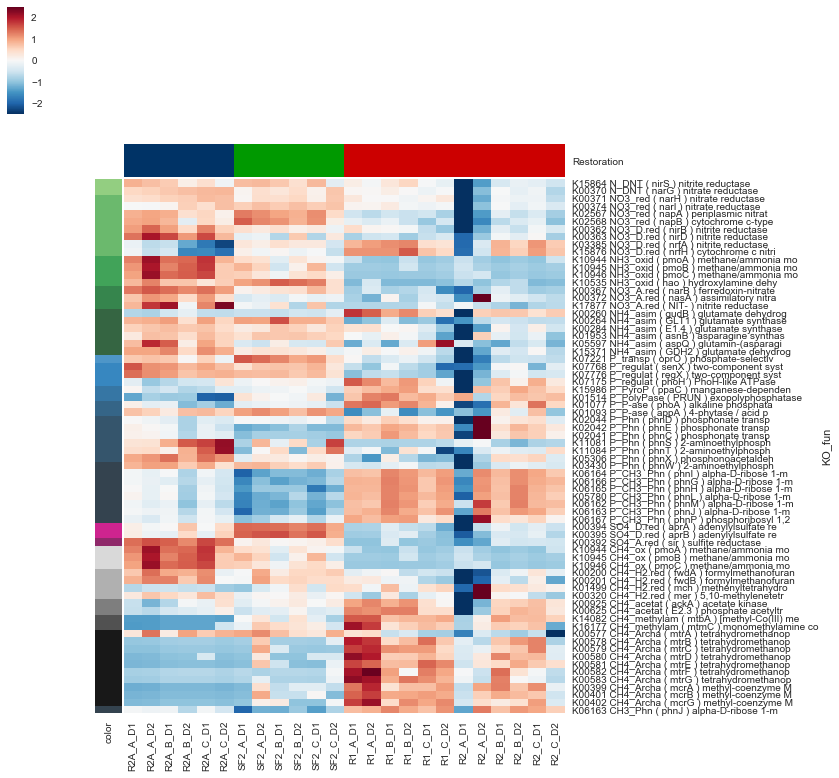

In [57]:
cm=sns.clustermap(Gene_abund_high_corr_rename, row_cluster=False, col_cluster=False, 
             square=False, vmin=-2.5, vmax=2.5, row_colors=gene_colors,col_colors=Restoration_color,z_score=0, figsize = (10,13));          # , figsize = (10,20))         
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)   # rotate ticks
plt.show()  